Chapter 22
# 三维向量场
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, simplify, expand, lambdify, diff

In [2]:
def fcn_n_grdnt(A, xxx1, xxx2, xxx3):

    x1,x2,x3 = symbols('x1 x2 x3')
    # 符号向量
    x = np.array([[x1,x2,x3]]).T
    # 二次型
    f_x = x.T@A@x
    f_x = f_x[0][0]
    print(simplify(expand(f_x)))

    # 计算梯度，符号
    grad_f = [diff(f_x,var) for var in (x1,x2,x3)]
    
    # 计算三元函数值 f(x1,x2,x3)
    f_x_fcn = lambdify([x1,x2,x3],f_x)
    ff_x = f_x_fcn(xxx1,xxx2,xxx3)

    # 梯度函数
    grad_fcn = lambdify([x1,x2,x3],grad_f)
    
    # 计算梯度
    V = grad_fcn(xxx1,xxx2,xxx3)
    
    # 修复梯度值
    if isinstance(V[0], int):
        V[0] = np.zeros_like(xxx1)
        
    if isinstance(V[1], int):
        V[1] = np.zeros_like(xxx1)

    if isinstance(V[2], int):
        V[2] = np.zeros_like(xxx1)
        
    return ff_x, V

## 创建数据

In [3]:
x1_array = np.linspace(-5,5,11)
x2_array = np.linspace(-5,5,11) 
x3_array = np.linspace(-5,5,11) 

xxx1, xxx2, xxx3 = np.meshgrid(x1_array, x2_array, x3_array)

In [7]:
A = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1]])

# 计算矩阵秩
print(np.linalg.matrix_rank(A))

3


In [8]:
# 计算三元函数值和梯度
f3_array, V = fcn_n_grdnt(A,xxx1,xxx2,xxx3)

x1**2 + x2**2 + x3**2


## 可视化

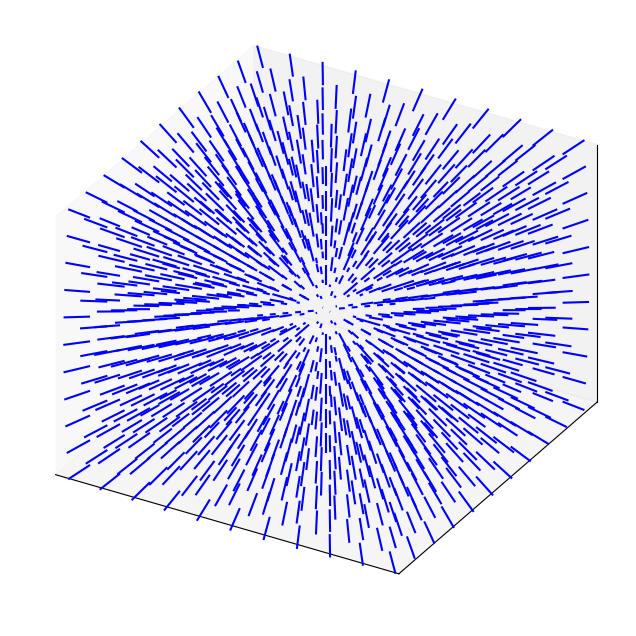

In [12]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.quiver(xxx1.ravel(), xxx2.ravel(), xxx3.ravel(), 
          V[0].ravel(), V[1].ravel(), V[2].ravel(), 
          colors = 'b',
          edgecolors='face',
          arrow_length_ratio = 0,
          length=0.8, normalize=True)

ax.set_proj_type('ortho')
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.savefig('test.svg')

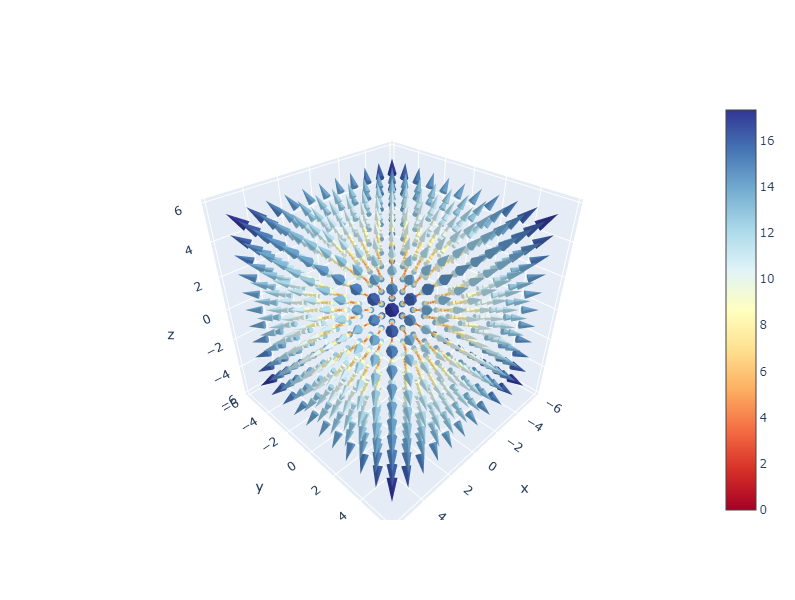

In [21]:
import plotly.graph_objects as go

fig = go.Figure(data = go.Cone(
    x=xxx1.ravel(),
    y=xxx2.ravel(),
    z=xxx3.ravel(),
    u=V[0].ravel(),
    v=V[1].ravel(),
    w=V[2].ravel(),
    colorscale='RdYlBu',
    sizemode="absolute",
    sizeref=18))

fig.update_layout(autosize=False,
                  width=600, height=600)
fig.show()